---
# Artificial Neural Network Regression
---

**Oleh :**
    
    - Taufik Fathurahman [1301160790]
    - Brenda Irena [1301164641]
    - Husnul Khotimah Farid [1301162742]

Neural Network adalah model yang terinspirasi oleh bagaimana neuron dalam otak manusia bekerja. Tiap neuron pada otak manusia salig berhubungan dan informasi mengalir dari setiap neuron tersebut. 



In [0]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kpbn5h30
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-kpbn5h30
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80547 sha256=519723221758755505756361cc8cef0a093f659d882a4c2a708d7559cdac9071
  Stored in directory: /tmp/pip-ephem-wheel-cache-wccdrzyh/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## 1 - Artificial Neural Network


*Artificial Neural Network* merupakan model yang terinspirasi oleh bagaimana neuron dalam otak manusia bekerja. Tiap neuron pada otak manusia saling berhubungan dan informasi mengalir dari setiap neuron tersebut. ANN terdiri dari input layer, hidden layer, dan output layer. Tiap neuron menerima input dan melakukan operasi dot dengan sebuah weight, menjumlahkannya (weighted sum) dan menambahkan bias. Hasil dari operasi ini akan dijadikan parameter dari activation function yang akan dijadikan output dari neuron tersebut.

Model pada ANN pada dasarnya merupakan fungsi model matematika yang mendefinisikan fungsi f : X -> Y. Secara umum, lapisan pada ANN dibagi menjadi tiga bagian:


*   Input Layer, terdiri dari neuron yang menerima data masukkan dari variabel X. Semua neuron pada lapis ini dapat terhubung ke neuron pada hidden layer atau langsung ke output layer jika tidak menggunakan hidden layer.
*   Hidden Layer, terdiri dari neuron yang menerima data dari input layer.
*   Output Layer, terdiri dari neuron yang menerima data dari hidden layer atau langsung dari input layer yang nilai keluarannya melambangkan hasil kalkulasi dari X menjadi nilai Y.






## 2 - Artificial Neural Network Regression

ANN Regresi memprediksi variabel output sebagai fungsi dari input. Fitur input (variabel independen) dapat berupa tipe kategorikal atau numerik, namun untuk ANN regresi, variabel yang diperlukan adalah variabel dependen numerik. Jika variabel output adalah variabel kategorikal (biner), maka ANN akan berfungsi sebagai classifier.

##3 - Activation Function

*Activation function* befungsi untuk mengubah sinyal input dari sebuah node di ANN menjadi sinyal output. Sinyal keluaran ini digunakan sebagai input ke lapisan berikutnya dalam tumpukan. *Activation function* menentukan apakah neuron tersebut harus “aktif” atau tidak berdasarkan dari *weighted sum* dari input. *Activation function* yang digunakan kali ini adalah Rectified Linear Unit (RelU). Persamaan matematikanya adalah sebagai berikut:

$$   f(x) = max (0, x)  $$
$$ f(x) = \Big \{\begin{matrix}0, & 𝑥 < 0\\ 1, & 𝑥 ≥ 0\end{matrix}$$

## 4 - Fully Connected Layer

*Fully connected layer* adalah lapisan dimana semua neuron aktivasi dari lapisan sebelumnya terhubung semua dengan neuron di lapisan selanjutnya seperti halnya jaringan syaraf tiruan biasa. Setiap aktivasi dari lapisan sebelumnya perlu diubah menjadi data satu dimensi sebelum dapat dihubungkan ke semua neuron di lapisan *fully-connected*.

---
# Simple Exploratory Data Analysis

In [0]:
SELECTED_COLS = ['bathrooms', 'waterfront', 'sqft_above', 'sqft_living15', 'grade', 
                 'yr_renovated', 'price', 'bedrooms', 'long', 'sqft_lot15', 'sqft_living', 
                 'condition', 'lat', 'sqft_basement', 'yr_built', 'sqft_lot', 'view']
                 
raw_dataset = pd.read_csv(
    'https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv',
    dtype={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
           'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 
           'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
           'floors':str, 'condition':int, 'lat':float, 'date':str, 
           'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int},
    na_values = "NaN",
    usecols = SELECTED_COLS,
    sep=",", 
    skipinitialspace=True 
)

In [0]:
raw_dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,8250,0,1,3,8,1340,500,1958,0,47.7767,-122.378,1970.0,7920.0
3161,780000.0,3.0,1.50,1620.0,7500,0,2,4,8,1620,0,1949,0,47.7014,-122.381,2440.0,7800.0
3162,720000.0,2.0,1.50,1840.0,9000,0,2,3,8,1340,500,1957,0,47.5281,-122.388,1880.0,7560.0
3163,415000.0,3.0,1.00,1360.0,73616,0,0,3,7,1360,0,1971,0,47.7528,-122.119,2040.0,50965.0


### a. Handle Missing Value

In [0]:
total = raw_dataset.isnull().sum().sort_values(ascending=False)
percent = (raw_dataset.isnull().sum()/raw_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
sqft_lot15,1,0.000316
sqft_living15,1,0.000316
condition,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
waterfront,0,0.000000
view,0,0.000000
grade,0,0.000000


In [0]:
'''
Karena missing value hanya berjumlah 2 data saja, maka kami memutuskan untuk menghiraukan 
row dataset yang memiliki missing value
'''
clean_dataset = raw_dataset.drop(raw_dataset.loc[raw_dataset['sqft_lot15'].isnull()].index)
clean_dataset = raw_dataset.drop(raw_dataset.loc[raw_dataset['sqft_living15'].isnull()].index)

In [0]:
# memerika missing value 
clean_dataset.isnull().sum().max()

0

In [0]:
clean_dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,431000.0,3.0,1.75,1630.0,9000,0,0,4,7,1630,0,1956,0,47.4521,-122.360,1600.0,11120.0
3160,485000.0,3.0,2.50,1840.0,8250,0,1,3,8,1340,500,1958,0,47.7767,-122.378,1970.0,7920.0
3161,780000.0,3.0,1.50,1620.0,7500,0,2,4,8,1620,0,1949,0,47.7014,-122.381,2440.0,7800.0
3162,720000.0,2.0,1.50,1840.0,9000,0,2,3,8,1340,500,1957,0,47.5281,-122.388,1880.0,7560.0


### b. Correlation

In [0]:
# sns.pairplot(clean_dataset)
# plt.show();

In [0]:
features = SELECTED_COLS
price_col = features.pop(6)

In [0]:
correlation={}
for f in features:
    data1 = clean_dataset[[f,price_col]]
    x1= data1[f].values
    x2= data1[price_col].values
    key = f
    correlation[key] = pearsonr(x1,x2)[0]

In [0]:
## Mengurutkan korelasi terhadap price

data_correlations = pd.DataFrame(correlation, index=['Value']).T
sorted_data_correlations = data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]
sorted_data_correlations

,Value
sqft_living,0.705048
grade,0.654124
sqft_living15,0.607973
sqft_above,0.599095
bathrooms,0.525509
view,0.443541
waterfront,0.366537
sqft_basement,0.348599
lat,0.301254
bedrooms,0.292742





Hanya mengambil 10 features yang memiliki korelasi paling tinggi dengan price

In [0]:
SELECTED_COLS = sorted_data_correlations.T.columns[:10].tolist()
SELECTED_COLS.append(price_col)

In [0]:
SELECTED_COLS

['sqft_living',
 'grade',
 'sqft_living15',
 'sqft_above',
 'bathrooms',
 'view',
 'waterfront',
 'sqft_basement',
 'lat',
 'bedrooms',
 'price']

In [0]:
clean_dataset = clean_dataset[SELECTED_COLS]

### c. Split untuk Train dan Test

In [0]:
train_dataset = clean_dataset.sample(frac=0.8,random_state=0)
test_dataset = clean_dataset.drop(train_dataset.index)

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sqft_living,2531.0,2082.547610,930.341649,430.0000,1430.00000,1910.0000,2500.0000,8010.0000
grade,2531.0,7.632556,1.175890,4.0000,7.00000,7.0000,8.0000,12.0000
sqft_living15,2531.0,1990.404583,692.501914,740.0000,1490.00000,1840.0000,2360.0000,5790.0000
sqft_above,2531.0,1776.760964,825.830264,430.0000,1200.00000,1550.0000,2167.5000,6720.0000
bathrooms,2531.0,2.075958,0.773565,0.0000,1.50000,2.0000,2.5000,6.0000
view,2531.0,0.248913,0.786543,0.0000,0.00000,0.0000,0.0000,4.0000
waterfront,2531.0,0.010668,0.102753,0.0000,0.00000,0.0000,0.0000,1.0000
sqft_basement,2531.0,305.786646,458.703172,0.0000,0.00000,0.0000,600.0000,2620.0000
lat,2531.0,47.558963,0.140975,47.1775,47.45915,47.5732,47.6805,47.7776
bedrooms,2531.0,3.393915,0.880232,0.0000,3.00000,3.0000,4.0000,7.0000


In [0]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

train_labels = np.log1p(train_labels)
test_labels = np.log1p(test_labels)

### d. Normalize dataset

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

---
# Buat Prediksi Price

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:79.1524,  mae:8.2820,  mse:79.1524,  val_loss:22.0942,  val_mae:4.1330,  val_mse:22.0942,  
....................................................................................................
Epoch: 100, loss:0.0637,  mae:0.1922,  mse:0.0637,  val_loss:0.0690,  val_mae:0.1985,  val_mse:0.0690,  
....................................................................................................
Epoch: 200, loss:0.0553,  mae:0.1825,  mse:0.0553,  val_loss:0.0606,  val_mae:0.1877,  val_mse:0.0606,  
....................................................................................................
Epoch: 300, loss:0.0511,  mae:0.1754,  mse:0.0511,  val_loss:0.0646,  val_mae:0.1922,  val_mse:0.0646,  
....................................................................................................
Epoch: 400, loss:0.0473,  mae:0.1691,  mse:0.0473,  val_loss:0.0744,  val_mae:0.2086,  val_mse:0.0744,  
....................................................................

#### Plot Training History

- MAE Metric

Text(0, 0.5, 'MAE [MPG]')

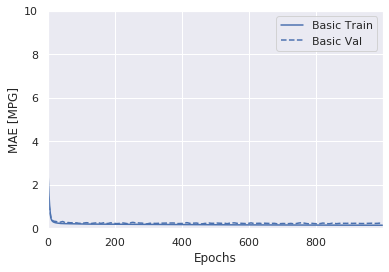

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

- MSE Metric

Text(0, 0.5, 'MSE [MPG^2]')

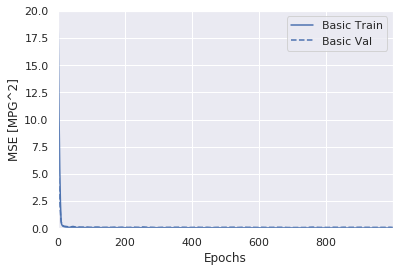

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

### Evaluate Model

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

test_labels = np.expm1(test_labels)
test_predictions = np.expm1(test_predictions)

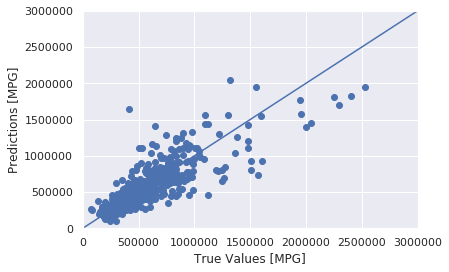

In [0]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 3000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

#### Error Distribution

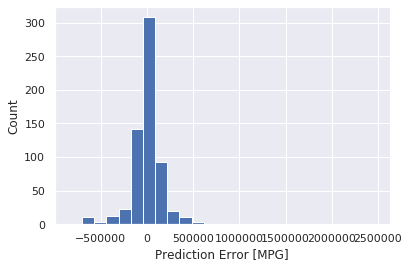

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

#### Hasil membentuk distrbusi gaussian, sesuai dengan apa yang diharapkan.


# Done :)

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(test_labels, test_predictions)

0.6537159967080203

In [0]:
y = model.predict(normed_train_data)

In [0]:
test_labels = np.expm1(y)

In [0]:
r2_score(train_labels, y)

0.8837560842517376